# Definitions and importing data

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Movie():
    """ Object used to hold a Movie and its properties. """
    def __init__(self, idx, name, genres):
        self.idx = idx
        self.name = name
        self.genres = genres
        self.ratings = []
        self.n_ratings = 0
        self.avg_score = 0
    def add_rating(self, rating):
        """ Update the average rating by taking average * n_ratings = total score. Then add the new rating,
        and then divide by (n_ratings + 1) to get the new average. """
        self.avg_score = (self.avg_score * self.n_ratings + rating) / (self.n_ratings + 1)
        self.n_ratings += 1
        self.ratings.append(rating)
    def __repr__(self):
        return "Movie - Id: {0.idx}, Name: {0.name}, n_ratings = {0.n_ratings}, Avg score = {0.avg_score}".format(self)

In [9]:
# Dictionary that associates each movie ID to its movie object
movies = {}
# Dictionary that associates each index to the genre name
genres = dict(zip(list(range(19)), ("Unknown", "Action", "Adventure", "Animation", "Childrens", "Comedy", 
                                    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", 
                                    "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western")))

# Read the list of movies and creates a dictionary of movie objects
with open("./data/movies.txt", "r", encoding="UTF8") as f:
    line = f.readline()
    
    # Split each line by the tab character. The 1st entry is the index, the 2nd entry is the name,
    # the 3rd entries onwards are the genres.
    while line != "":
        line = line.split("\t")
        # Convert the index to an int, convert the genres to a list of ints
        idx, name, genres_belong = int(line[0]), line[1], line[2:]
        movies[idx] = Movie(idx, name, [int(x) for x in genres_belong])
        
        line = f.readline()

(array([833.,   0., 569.,   0., 215.,   0.,  51.,   0.,  11.,   3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

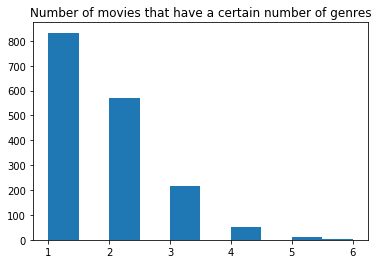

In [16]:
# Plots the number of genres that each movie belongs to.
num_genres = [sum(movie.genres) for movie in list(movies.values())]
plt.title("Number of movies that have a certain number of genres")
plt.hist(num_genres)

In [17]:
# Read the ratings files and convert into a list of 3-tuples
def read_data(filename):
    with open(filename, "r") as f:
        data = f.readlines()
    # Split each line by the tab character and convert to a tuple of ints
    return [tuple(map(int, line.split("\t"))) for line in data]
       
full = read_data("./data/data.txt")

# Extract only the ratings from the full dataset
full_ratings = [datapt[2] for datapt in full]

In [18]:
# Go through the entire rating databast and add all the ratings for each movie
for rating_tuple in full:
    user_idx, movie_idx, rating = rating_tuple
    movies[movie_idx].add_rating(rating)

# Data manipulation and extraction

In [19]:
# Get the top 10 most popular movies by sorting the list of movies by n_ratings
most_pop10 = sorted(list(movies.values()), key=lambda x: x.n_ratings, reverse=True)[:10]
# Movie IDs of these movies
most_pop10_idx = [movie.idx for movie in most_pop10]

# Get the top 10 best movies by sorting the list of movies by avg_score
best10 = sorted(list(movies.values()), key=lambda x: x.avg_score, reverse=True)[:10]
# Movie IDs of these movies
best10_idx = [movie.idx for movie in best10]

In [23]:
# Print how many movies fall in each genre 
for i in range(19):
    print(i, genres[i], len([movie.idx for movie in list(movies.values()) if movie.genres[i]]))
    
# Collect the indices of movies that have these genres into lists
genre1_idx = [movie.idx for movie in list(movies.values()) if movie.genres[1]]
genre2_idx = [movie.idx for movie in list(movies.values()) if movie.genres[2]]
genre17_idx = [movie.idx for movie in list(movies.values()) if movie.genres[17]]

0 Unknown 2
1 Action 251
2 Adventure 135
3 Animation 42
4 Childrens 122
5 Comedy 505
6 Crime 109
7 Documentary 50
8 Drama 725
9 Fantasy 22
10 Film-Noir 24
11 Horror 92
12 Musical 56
13 Mystery 61
14 Romance 247
15 Sci-Fi 101
16 Thriller 251
17 War 71
18 Western 27


# Start of Plotting Section

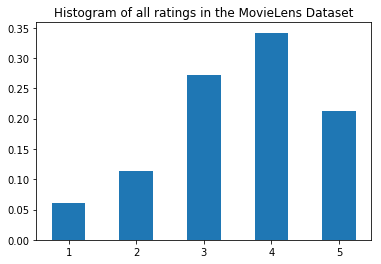

In [21]:
plt.title("Histogram of all ratings in the MovieLens Dataset")
plt.hist(full_ratings, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5, normed=True)
plt.savefig("./Visualizations/Fig4-1.png", dpi=300)
plt.show()

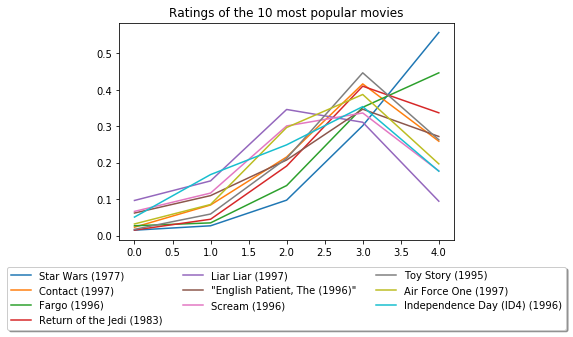

In [22]:
fig = plt.figure()
ax = plt.subplot()

ratings_arr = [movies[i].ratings for i in most_pop10_idx]
labels_arr = [movies[i].name for i in most_pop10_idx]

# plt.hist(ratings_arr, bins=[1, 2, 3, 4, 5, 6], align="left", histtype="barstacked", rwidth=0.5, label=labels_arr)
for i in range(len(ratings_arr)):
    counts = np.array([ratings_arr[i].count(j) for j in range(1,6)])
    counts = counts / sum(counts)
    plt.plot(counts, label=labels_arr[i])

# Put a legend below current axis
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

ax.set_title("Ratings of the 10 most popular movies")
plt.savefig("./Visualizations/Fig4-2.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

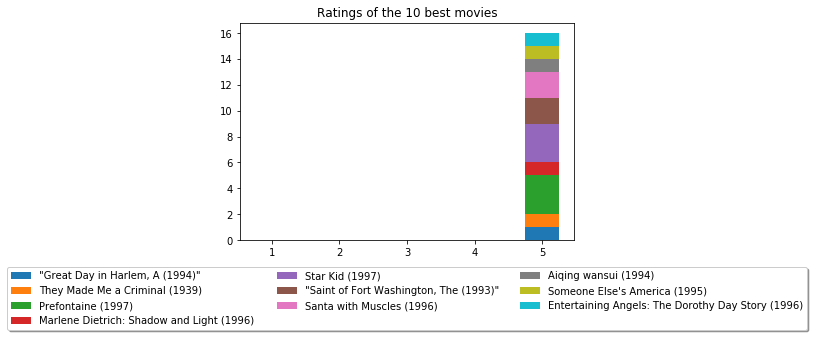

In [31]:
fig = plt.figure()
ax = plt.subplot()

ratings_arr = [movies[i].ratings for i in best10_idx]
labels_arr = [movies[i].name for i in best10_idx]

plt.hist(ratings_arr, bins=[1, 2, 3, 4, 5, 6], align="left", histtype="barstacked", rwidth=0.5, label=labels_arr)

# Put a legend below current axis
lgd = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=3)

ax.set_title("Ratings of the 10 best movies")
plt.savefig("./Visualizations/Fig4-3.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

Mean =  3.480245417953027


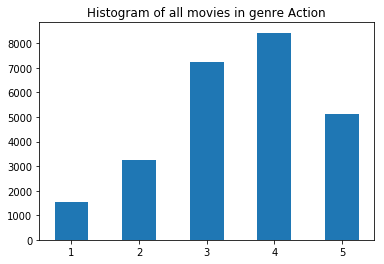

In [24]:
# We use itertools.chain to flatten the list of lists into a single generator, then list() to convert to list
genre1_scores = list(itertools.chain(*[movies[i].ratings for i in genre1_idx]))
print("Mean = ", np.mean(genre1_scores))

plt.title("Histogram of all movies in genre {}".format(genres[1]))
plt.hist(genre1_scores, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5)
plt.savefig("./Visualizations/Fig4-4-1.png", dpi=300)
plt.show()

Mean =  3.503526503308369


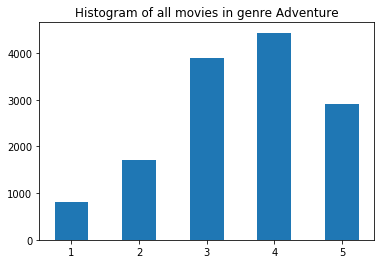

In [25]:
# We use itertools.chain to flatten the list of lists into a single generator, then list() to convert to list
genre2_scores = list(itertools.chain(*[movies[i].ratings for i in genre2_idx]))
print("Mean = ", np.mean(genre2_scores))

plt.title("Histogram of all movies in genre {}".format(genres[2]))
plt.hist(genre2_scores, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5)
plt.savefig("./Visualizations/Fig4-4-2.png", dpi=300)
plt.show()

Mean =  3.815811874866993


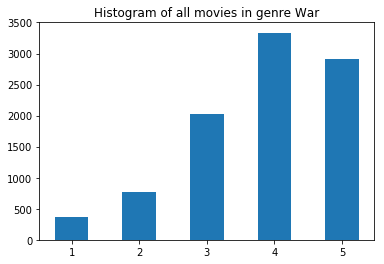

In [26]:
# We use itertools.chain to flatten the list of lists into a single generator, then list() to convert to list
genre17_scores = list(itertools.chain(*[movies[i].ratings for i in genre17_idx]))
print("Mean = ", np.mean(genre17_scores))

plt.title("Histogram of all movies in genre {}".format(genres[17]))
plt.hist(genre17_scores, bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5)
plt.savefig("./Visualizations/Fig4-4-3.png", dpi=300)
plt.show()

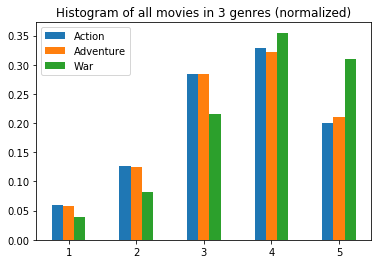

In [40]:
plt.hist([genre1_scores, genre2_scores, genre17_scores], bins=[1, 2, 3, 4, 5, 6], align="left", rwidth=0.5, normed=True, label=(genres[1], genres[2], genres[17]))
plt.legend()
plt.title("Histogram of all movies in 3 genres (normalized)")
plt.savefig("./Visualizations/Fig4-4-4.png", dpi=300)
plt.show()